# Importar llibreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar taules amb pandas i vista d'ocell

In [47]:
taula=pd.read_csv("/Users/oscarpo/documents/NFLX.csv")

In [48]:
taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465


In [49]:
taula.shape

(252, 7)

# Tema 1. Creació variables bàsiques

In [50]:
taula['Close1']=taula['Close'].shift(-1)

In [51]:
#diferencia de preu respecte al del di seguent
taula['PriceDiff'] = taula['Close'].shift(-1)- taula['Close']

In [52]:
taula['Return'] = taula['PriceDiff'] /taula['Close']

In [53]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - taula

taula['Direction'] = [1 if taula['PriceDiff'].loc[ei] > 0 else 0 for ei in taula.index ]

In [54]:
taula['ma10'] = taula['Close'].rolling(10).mean() #fast signal
taula['ma50'] = taula['Close'].rolling(50).mean() #slow signal

taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,Return,Direction,ma10,ma50
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100,320.799988,5.319977,0.016863,1,302.570999,293.139999
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400,332.220001,11.420013,0.035599,1,304.218997,294.141598
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300,336.899994,4.679993,0.014087,1,307.154999,295.435399
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,333.100006,-3.799988,-0.011279,0,310.109998,296.563798
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465,NaN,NaN,NaN,0,313.169998,297.567198


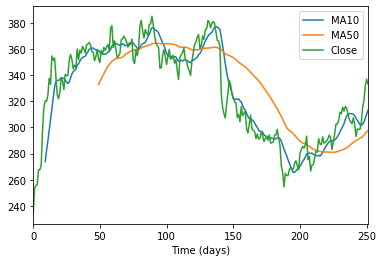

In [55]:
#plot the moving average
#plt.figure(figsiz2=(10, 8))
taula['ma10'].plot(label='MA10')
taula['ma50'].plot(label='MA50')
taula['Close'].plot(label='Close')
plt.legend()
plt.xlabel('Time (days)') 
plt.show()

# Tema 1. Estratègia bàsica d'exemple: Si MA10 > MA50 --> Buy and hold 1 share

In [56]:
taula['shares']=[1 if taula.loc[ei,'ma10'] > taula.loc[ei,'ma50'] else 0
              for ei in taula.index]

Text(0, 0.5, 'Profit (resultat diari) ($)')

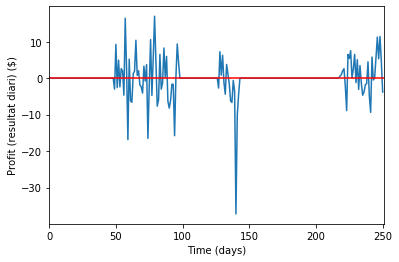

In [57]:
taula['profit']=[taula.loc[ei,'Close1'] - taula.loc[ei,'Close'] 
                 if taula.loc[ei, 'shares']==1 else 0
                 for ei in taula.index]

taula['profit'].plot()
plt.axhline(y=0,color='red')
plt.xlabel('Time (days)') 
plt.ylabel('Profit (resultat diari) ($)') 

In [58]:
taula['wealth']=taula['profit'].cumsum()

In [59]:
taula.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Close1,PriceDiff,Return,Direction,ma10,ma50,shares,profit,wealth
247,2019-12-17,307.359985,316.799988,306.600006,315.480011,315.480011,10427100,320.799988,5.319977,0.016863,1,302.570999,293.139999,1,5.319977,-19.920013
248,2019-12-18,316.260010,325.359985,315.600006,320.799988,320.799988,11207400,332.220001,11.420013,0.035599,1,304.218997,294.141598,1,11.420013,-8.500000
249,2019-12-19,324.500000,332.829987,324.179993,332.220001,332.220001,9822300,336.899994,4.679993,0.014087,1,307.154999,295.435399,1,4.679993,-3.820007
250,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,333.100006,-3.799988,-0.011279,0,310.109998,296.563798,1,-3.799988,-7.619995
251,2019-12-23,337.760010,337.950012,331.040009,333.100006,333.100006,5130465,NaN,NaN,NaN,0,313.169998,297.567198,1,NaN,NaN


Text(0, 0.5, 'Wealth (Resultats) ($)')

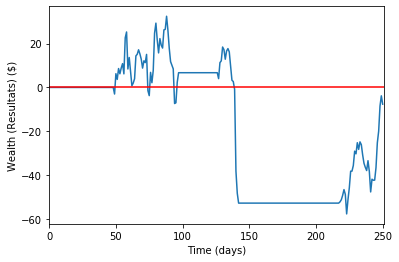

In [60]:
taula['wealth'].plot()
plt.axhline(y=0,color='red')
plt.xlabel('Time (days)') 
plt.ylabel('Wealth (Resultats) ($)') 

# Tema 2.2 Frequency, Relative Frequency and Distributions

#Es pren com a exemple joc de llançament de 2 daus (Discrete Random Variable)
#Al següent tema s'apliquen els nous conceptes a la borsa (Continuous Random Variable)

In [61]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 5000 #numero de cops que tirem els daus
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)] 
#tirar els daus 50 vegades i sumar cada cop el valor dels 2 daus
results[:10] #mostrar 10 resultats

[6, 7, 9, 6, 6, 7, 5, 10, 6, 8]

In [62]:
# FREQUENCY:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts() 
#value_counts de pandas genera una taula amb 2 variables, els valors possibles que a la vegada són l'index de la taula i la freqüència de cada cas.
sort_freq = freq.sort_index() #generem taula ordenada per l'index, és a dir, pels valors possibles.
print(sort_freq)

2     162
3     276
4     423
5     531
6     691
7     777
8     713
9     563
10    439
11    290
12    135
Name: 0, dtype: int64


# Frequency of a discrete random variable

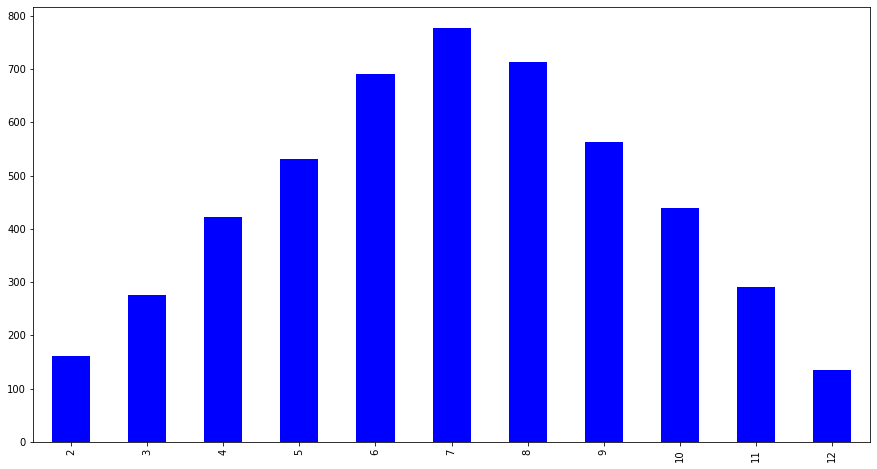

In [63]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

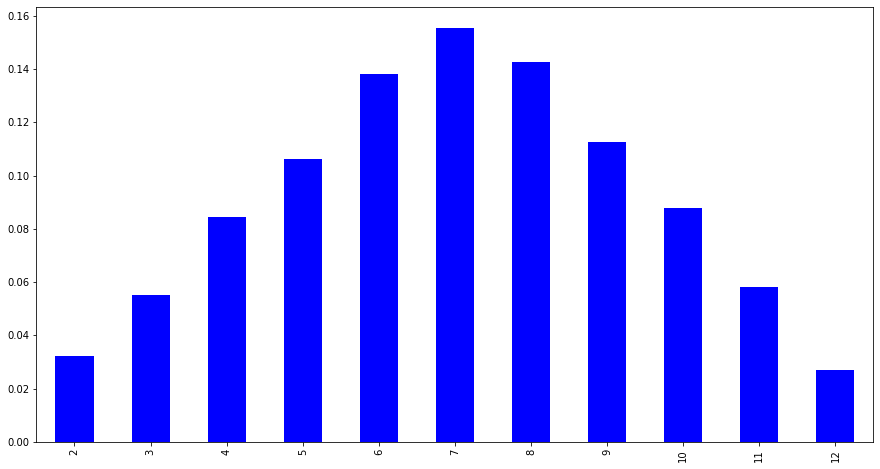

In [64]:
# RELATIVE FREQUENCY
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))
#pintem la frequencia relativa si tirem els daus 5.000 cops

# Distribution of a Discrete Random Variable

In [65]:
# DISTRIBUTION OF A RANDOM VARIABLE
# Taula amb 2 variables: 1. Valors possibles de la variable, 2. Probabilitat de cada valor.
# És la manera de veure quina freqüencia relativa tindríem si tirem els daus infinits cops.
# X= 2      P(2)=1*(1/6)**2
# X= 3      P(2)=2*(1/6)**2
# X= 4      P(2)=3*(1/6)**2
# X= 5      P(2)=4*(1/6)**2
# X= 6      P(2)=5*(1/6)**2
# X= 7      P(2)=6*(1/6)**2
# X= 8      P(2)=5*(1/6)**2
# X= 9      P(2)=4*(1/6)**2
# X= 10     P(2)=3*(1/6)**2
# X= 11     P(2)=2*(1/6)**2
# X= 12     P(2)=1*(1/6)**2

# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [66]:
# MEAN (OR EXPECTATION) OF A DISTRIBUTION: SUM(i)(p(i)*x(i))
    # Mean: Mitja de tots els valors de sortida ponderat per les probabilitats
# VARIANCE OF A DISTRIBUTION: SUM(I)((X(i)-mean)**2)*p(i)
    # Variance: Descriu la variació dels valors de sortida

mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999998 5.833333333333333


# Tema 2.3 Models de Distribució

# PDF: Probability Density Function

# CDF: Cumulative Distribution Function

#Per a variables continues no sabem la mitja ni la variància, pel que cal pintar funcions tipus PDF i CDF per a poder analitzar.

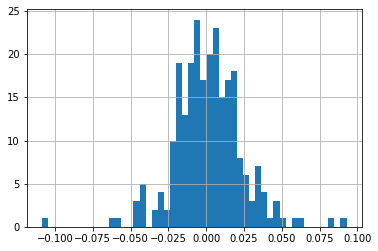

In [68]:
#log daily return
taula['LogReturn']= np.log(taula['Close'].shift(-1)) - np.log(taula['Close'])
taula['LogReturn'].hist(bins=50) #pintem histograma, es similar a una normal distribution

In [69]:
from scipy.stats import norm

In [70]:
#Density functions of a random variable are only related to their mean and variance
#EXEMPLE amb variable continua amb valors entre -4 i 4.
density=pd.DataFrame()
density['x']=np.arange(-4,4,0.001)
density['pdf']=norm.pdf(density['x'],0,1)
density['cdf']=norm.cdf(density['x'],0,1)

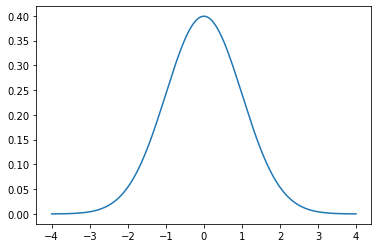

In [71]:
plt.plot(density['x'],density['pdf'])

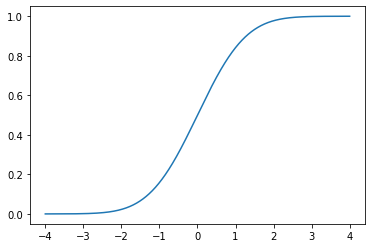

In [72]:
plt.plot(density['x'],density['cdf'])

In [73]:
#Aplicació a la borsa. mu i sigma no són com mean i variance per a les variables discretes, però s'assembla.
mu=taula['LogReturn'].mean() #mean
sigma=taula['LogReturn'].std(ddof=1) #standard deviation
print(mu, sigma)

0.0014089027032919868 0.02256957088750536


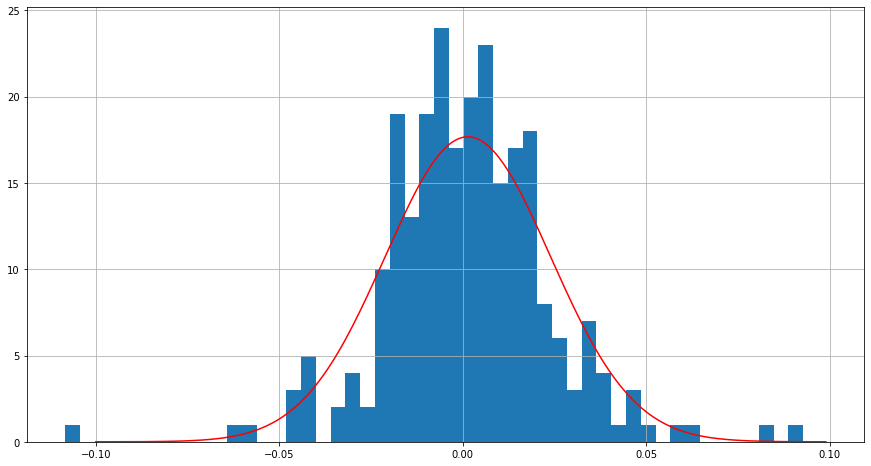

In [75]:
denTaula=pd.DataFrame()
denTaula['x']= np.arange(-0.1, 0.1, 0.001)
denTaula['pdf']=norm.pdf(denTaula['x'], mu, sigma)

# Plot a histogram to show the distribution of log return of Netflix or whatever stock. 
# You can see LOG RETURN it is very close to a NORMAL DISTRIBUTION

taula['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(denTaula['x'], denTaula['pdf'], color='red')
plt.show()

# Càlcul probabilitat retorn diari < -5%

ValueError: operands could not be broadcast together with shapes (901,) (1501,) 

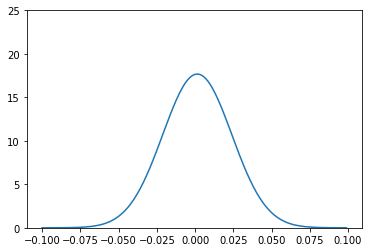

In [77]:
#pintar de rosa probabilitats que el daily return < -5%
#No va, revisar
plt.ylim(0,25)
plt.plot(denTaula['x'], denTaula['pdf'])
plt.fill_between(x=np.arange(-0.1, -0.01, 0.0001), 
                y2=0,
                y1=norm.pdf(np.arange(-0.1, 0.05, 0.0001), mu, sigma),
                facecolor='pink',
                alpha= 0.5)

In [78]:
#Calcular probabilitat que el daily return sigui inferior a -5%
prob_return1=norm.cdf(-0.05, mu, sigma)
print('The probability of a daily return < -5% is: ', prob_return1)

The probability of a daily return < -5% is:  0.011369335144007396


# Càlcul probabilitat caure un 40% el valor durant 1 any

In [85]:
#Necessitem calcular la mitja (mean) i la desviació estàndard durant un any (standard deviation of a yearly return).
#Suposem que els daily returns són independents.
#Això implica que la variance d'un any és la suma de les variance de tots els dies de l'anu (220 dies). I el mateix per la mean.
mu220=mu*220
sigma220=220**0.5*sigma #APROFUNDIR SOBRE AQUEST PUNT, NO ENTENC LA FORMULA.
print(mu220, sigma220)
print('The probability of dropping > 40% in 220 days is: ', norm.cdf(-0.4, mu220, sigma220))

0.3099585947242371 0.33476083494063114
The probability of dropping > 40% in 220 days is:  0.016969592987112207


# Normal distribution quantiles
# PPF: Percent Point Function

In [86]:
# S'obté usant norm.ppf
# VaR: Value of Risk: it estimates how much a set of investments might lose with a given probability.
# Exemple: 5% of quantile daily return is called 95% VaR or VaR at the level of 95%.
norm.ppf(0.05, mu, sigma)

-0.035714737829759584

In [ ]:
#vol dir que hi ha un 5% de probabilitat que el daily return sigui < -3%.

# A la vida real els Fatter tails (valors extrems) són més típics del que diu una distribució normal.


# Tema 3. Inferencial Stastistics

#Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible. 

#The other main branch of statistics is descriptive statistics. For more information on descriptive statistics. Descriptive statistics provide a concise summary of data.

# 3.1. Population and Sample
#Introducing random samplig and samples


In [13]:
# sampling with or without replacement.
#Exemple:
data = pd.DataFrame()
data['Population'] = [47,48,85,20,19,13,72,16,50,60]
a_sample_without_replacement = data['Population'].sample(5,replace=False)
a_sample_with_replacement = data['Population'].sample(5,replace=True)
print("a_sample_without_replacement:\n", a_sample_without_replacement)
print("a_sample_with_replacement:\n", a_sample_with_replacement)

a_sample_without_replacement:
 9    60
7    16
2    85
5    13
8    50
Name: Population, dtype: int64
a_sample_with_replacement:
 1    48
7    16
0    47
8    50
1    48
Name: Population, dtype: int64


In [24]:
#Parameters. Characteristic or summary number of population. Examples: mean, variance, standard deviation.
#Statistics. Characzteristic or summary number of sample. Examples: sample mean, sample variance, sample standard deviation.
print("Population mean is: ", data['Population'].mean())
print("Population variance is: ", data['Population'].var(ddof=0)) #ddof=0 vol dir que el denominador sigui N.
print("Population standard deviation is: ", data['Population'].std(ddof=0))
print("Population size is: ", data['Population'].shape[0])

a_sample=data['Population'].sample(10,replace=True)
print("Sample mean is: ", a_sample.mean())
print("Sample variance is: ", a_sample.var(ddof=1)) #ddof=1 vol dir que el denominador sigui N-1.
#En la variància d'una sel·leció (sample), cal restar 1 a la N per a semblar-se més a la variància de tota la població.
#Degrees of freedom: The numbers of values in calculation that are free to variate.
print("Sample standard deviation is: ", a_sample.std(ddof=1))
print("Sample size is: ", a_sample.shape[0])

Population mean is:  43.0
Population variance is:  571.8
Population standard deviation is:  23.912339910598458
Population size is:  10
Sample mean is:  50.1
Sample variance is:  482.7666666666667
Sample standard deviation is:  21.971951817411824
Sample size is:  10


# 3.2. Distribution of Sample Statistics
#Distribution of sample.
#Understand distribution of sample mean.

# 3.3 Confidence Interval
#How to estimate using confidence interval

# 3.4 Hypothesis Testing
#Validate claims using hypothesis testing